In [2]:
sc.install_pypi_package("ipywidgets")
sc.install_pypi_package("jupyterlab_widgets")
sc.install_pypi_package("openmeteo-requests")
sc.install_pypi_package("requests-cache")
sc.install_pypi_package("retry-requests")
sc.install_pypi_package("numpy")
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("boto3")
sc.install_pypi_package("IPython")
sc.install_pypi_package("plotly")
sc.install_pypi_package("nbformat")
sc.install_pypi_package("pykernel")
sc.list_packages()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Package already installed for current Spark context!
Traceback (most recent call last):
  File "/mnt/yarn/usercache/livy/appcache/application_1739965870960_0002/container_1739965870960_0002_01_000002/pyspark.zip/pyspark/context.py", line 2614, in install_pypi_package
    raise ValueError("Package already installed for current Spark context!")
ValueError: Package already installed for current Spark context!



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

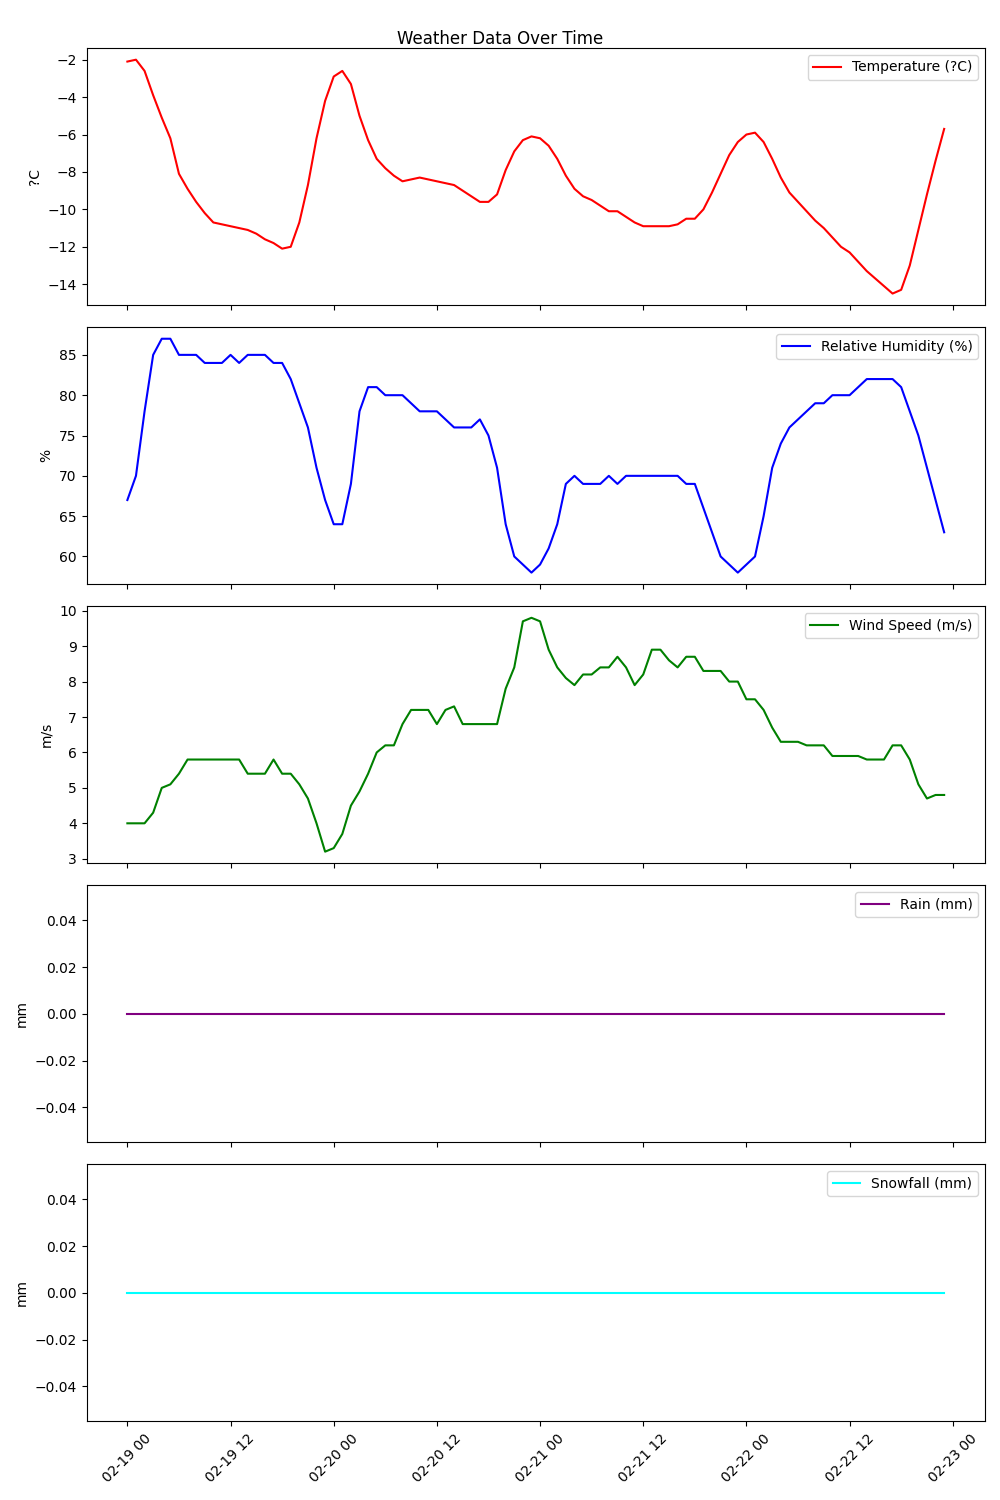

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
from threading import Timer

# Funkcja do pobierania danych pogodowych
def fetch_weather_data(latitude, longitude):
    url = f"https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,relativehumidity_2m,windspeed_10m,rain,snowfall&forecast_days=4"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Błąd podczas pobierania danych.")
        return None

# Funkcja do przetwarzania danych
def process_weather_data(data):
    hourly_data = data['hourly']
    df = pd.DataFrame(hourly_data)
    df['time'] = pd.to_datetime(df['time'])
    return df

# Funkcja do wyświetlania danych w tabeli
def display_weather_data(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    clear_output(wait=True)
    display(df.head(20))

# Funkcja do tworzenia wykresów
def create_plots(df):
    clear_output(wait=True)  # Czyści poprzednie wykresy

    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15), sharex=True)
    fig.suptitle("Weather Data Over Time")

    # Temperature plot
    axes[0].plot(df['time'], df['temperature_2m'], label='Temperature (°C)', color='red')
    axes[0].set_ylabel("°C")
    axes[0].legend()

    # Relative Humidity plot
    axes[1].plot(df['time'], df['relativehumidity_2m'], label='Relative Humidity (%)', color='blue')
    axes[1].set_ylabel("%")
    axes[1].legend()

    # Wind Speed plot
    axes[2].plot(df['time'], df['windspeed_10m'], label='Wind Speed (m/s)', color='green')
    axes[2].set_ylabel("m/s")
    axes[2].legend()

    # Rain plot
    axes[3].plot(df['time'], df['rain'], label='Rain (mm)', color='purple')
    axes[3].set_ylabel("mm")
    axes[3].legend()

    # Snowfall plot
    axes[4].plot(df['time'], df['snowfall'], label='Snowfall (mm)', color='cyan')
    axes[4].set_ylabel("mm")
    axes[4].legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

latitude = 64.93
longitude = -147.13

# Dynamiczne odświeżanie danych
def dynamic_weather_display(interval=10):
    data = fetch_weather_data(latitude, longitude)
    if data:
        df = process_weather_data(data)
        display_weather_data(df)
        create_plots(df)
    Timer(interval, dynamic_weather_display, [interval]).start()

# Uruchom dynamiczne wyświetlanie danych
dynamic_weather_display()

%matplot plt